In [1]:
# Standard module imports
import numpy as np
import scipy.stats as stats
import pandas as pd

%matplotlib inline

# Useful directories
gh_dir = '/Users/ttshimiz/Github/'
sed_fit_dir = gh_dir + 'bat-agn-sed-fitting/'
casey_dir = sed_fit_dir + 'analysis/casey_bayes_results/'
data_dir = gh_dir + 'bat-data/'

/Users/ttshimiz/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [71]:
# Setup the figures
execfile('../code/figure-setup.py')

In [15]:
# Upload the fitting results for each model
bat_casey = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/'+
                        'analysis/casey_bayes_results/beta_fixed_2_wturn_gaussianPrior/'+
                        'final_fit_results_beta_fixed_2_wturn_gaussianPrior_v3.csv', index_col=0)
bat_casey_undetected = pd.read_csv(casey_dir+'beta_fixed_2_wturn_gaussianPrior/final_fit_results_beta_fixed_2_wturn_gaussianPrior_undetected.csv', index_col=0)

bat_decompir = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/decompir_results/sb+arp220/final_fit_results_decompir_sb_and_arp220_mle.csv', index_col=0)
bat_decompir_uncertain = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/decompir_results/sb+arp220/final_fit_results_decompir_sb_and_arp220_uncertainties.csv', index_col=0)
bat_decompir = bat_decompir.join(bat_decompir_uncertain)
bat_decompir_undetected = pd.read_csv(sed_fit_dir+'analysis/decompir_results/sb+arp220/final_fit_results_decompir_sb_and_arp220_undetected.csv', index_col=0)

bat_dale14 = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/dale14_results/final_fit_results_dale14.csv', index_col=0)
bat_dale14_undetected = pd.read_csv(sed_fit_dir+'analysis/dale14_results/final_fit_results_dale14_undetected.csv', index_col=0)

# Remove 'bad' sources
bad_sources = np.array(['PICTORA', '3C111.0', '3C120',
                        '2MASXJ23272195+1524375', 'PKS2331-240',
                        'HB890241+622', 'Mrk3'])
bat_casey = bat_casey.drop(bad_sources)
bat_decompir = bat_decompir.drop(bad_sources)
bat_dale14 = bat_dale14.drop(bad_sources)

# Upload the info for the BAT AGN (i.e. AGN type, luminosity distance, redshift, etc)
bat_info = pd.read_csv(data_dir+'bat_info.csv', index_col=0)

In [64]:
# Use only sources with secure AGN fractions
# That means excluding the "undetected" sources with less than 4 SED points as well as the ones with negative AGN fractions

bat_agn_frac = pd.DataFrame(index = bat_info.index)
bat_agn_frac['agnfracc12'] = bat_casey['agn_frac'][bat_casey['agn_frac_16'] > 0]
bat_agn_frac['agnfracdecompir'] = bat_decompir['agn_frac']
bat_agn_frac['agnfracd14'] = bat_dale14['agn_frac']

bat_agn_frac = bat_agn_frac.dropna()

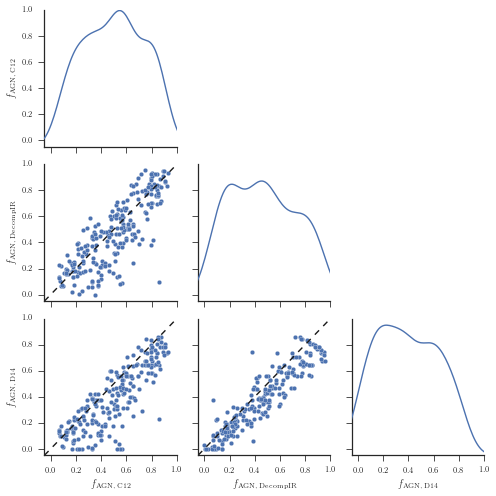

In [72]:
# Plot the correlation between each LIR using seaborn's pairplot method
g = sn.pairplot(bat_agn_frac, diag_kind="kde", size=textwidth/3., aspect=1.)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

for i,ax in enumerate(g.axes[-1,:]):
    if i == 0:
        ax.xaxis.set_label_text(r'$f_{\rm AGN,\,C12}$')
    elif i == 1:
        ax.xaxis.set_label_text(r'$f_{\rm AGN,\,DecompIR}$')
    elif i == 2:
        ax.xaxis.set_label_text(r'$f_{\rm AGN,\,D14}$')

for i,ax in enumerate(g.axes[:,0]):
    if i == 0:
        ax.yaxis.set_label_text(r'$f_{\rm AGN,\,C12}$')
        #ax.yaxis.set_ticklabels([])
    elif i == 1:
        ax.yaxis.set_label_text(r'$f_{\rm AGN,\,DecompIR}$')
    elif i == 2:
        ax.yaxis.set_label_text(r'$f_{\rm AGN,\,D14}$')
        
for i, j in zip(*np.tril_indices_from(g.axes, 1)):
    g.axes[i,j].set_xlim(-0.05, 1.0)
    g.axes[i,j].xaxis.set_ticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    g.axes[i,j].set_ylim(-0.05, 1.0)
    if i != j:
        g.axes[i,j].plot(np.arange(-0.05, 1.01, 0.001), np.arange(-0.05, 1.01, 0.001), 'k--')
g.fig.savefig(figsave_dir+'agn_frac-comparison.pdf', bbox_inches='tight')

In [42]:
bat_agn_frac['agnfracc12'].describe()

count    224.000000
mean       0.500729
std        0.236382
min        0.064492
25%        0.320592
50%        0.519681
75%        0.689845
max        0.932310
Name: agnfracc12, dtype: float64

In [44]:
bat_agn_frac['agnfracdecompir'].describe()

count    2.240000e+02
mean     4.641716e-01
std      2.614445e-01
min      1.638254e-12
25%      2.291034e-01
50%      4.594101e-01
75%      6.892905e-01
max      9.551734e-01
Name: agnfracdecompir, dtype: float64

In [46]:
bat_agn_frac['agnfracd14'].describe()

count    224.000000
mean       0.394150
std        0.238296
min        0.000000
25%        0.191550
50%        0.372700
75%        0.589800
max        0.858800
Name: agnfracd14, dtype: float64

In [48]:
(bat_agn_frac['agnfracc12'] - bat_agn_frac['agnfracdecompir']).describe()

count    224.000000
mean       0.036558
std        0.154694
min       -0.279452
25%       -0.071324
50%        0.011085
75%        0.123549
max        0.760834
dtype: float64

In [50]:
(bat_agn_frac['agnfracc12'] - bat_agn_frac['agnfracd14']).describe()

count    224.000000
mean       0.106579
std        0.136578
min       -0.126963
25%        0.003467
50%        0.094310
75%        0.185357
max        0.631071
dtype: float64

In [52]:
(bat_agn_frac['agnfracdecompir'] - bat_agn_frac['agnfracd14']).describe()

count    224.000000
mean       0.070022
std        0.100118
min       -0.365105
25%        0.007175
50%        0.068052
75%        0.132050
max        0.327466
dtype: float64

In [54]:
stats.pearsonr(bat_agn_frac['agnfracc12'], bat_agn_frac['agnfracdecompir'])

(0.81147311744058859, 1.0616356004018503e-53)

In [56]:
stats.pearsonr(bat_agn_frac['agnfracc12'], bat_agn_frac['agnfracd14'])

(0.83445512970658464, 2.2644521522029707e-59)

In [57]:
stats.pearsonr(bat_agn_frac['agnfracdecompir'], bat_agn_frac['agnfracd14'])

(0.92385529858779614, 1.4705527273459555e-94)